In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = yf.download('RELIANCE.NS', start = '2013-01-01', end='2023-09-27')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,418.037415,419.325226,415.610443,416.402924,386.519775,3152667
2013-01-02,418.037415,423.981079,417.319244,419.993866,389.852997,6203434
2013-01-03,420.315826,426.952911,418.334595,426.333771,395.737946,7968629
2013-01-04,426.903381,428.240692,422.767578,426.878632,396.243683,6140890
2013-01-07,428.785553,431.410645,421.900787,424.278259,393.829926,7064261
...,...,...,...,...,...,...
2023-09-20,2423.050049,2427.600098,2355.000000,2382.149902,2382.149902,28540942
2023-09-21,2374.949951,2390.100098,2360.000000,2364.800049,2364.800049,6113091
2023-09-22,2376.000000,2382.449951,2350.000000,2354.949951,2354.949951,9588393


In [ ]:
#Get the size
df.shape

(2650, 6)

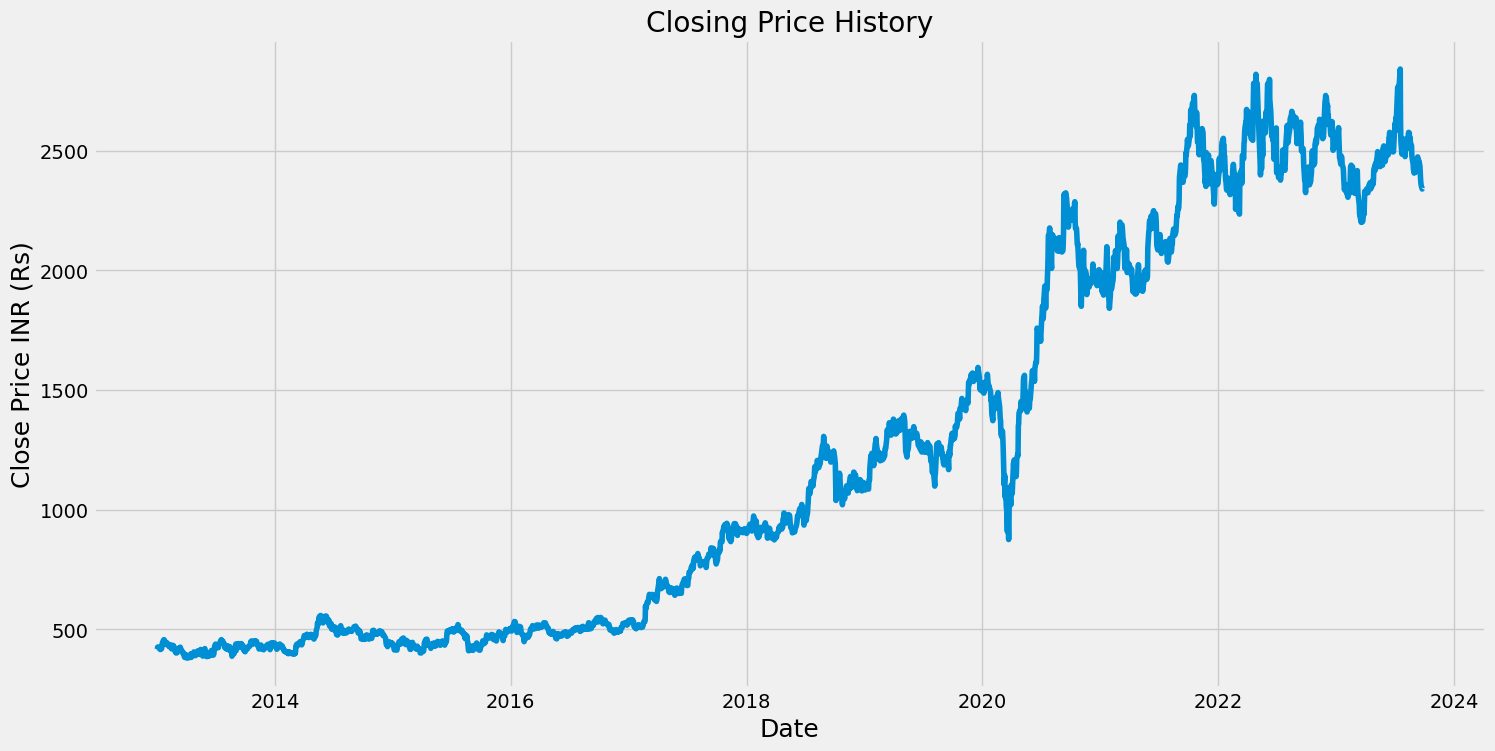

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.show()

In [ ]:
#Create a new DF with 'Close Column'
data = df.filter(['Close'])
#Convert to numpy array
dataset = data.values
#Train the model
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2120

In [ ]:
#Scale the data to 0 and 1 inclusive
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01471824],
       [0.01617697],
       [0.01875241],
       ...,
       [0.80220809],
       [0.7963178 ],
       [0.79715058]])

In [ ]:
#Create Training Dataset
train_data = scaled_data[0:training_data_len,:]
#Split into x_train y_train
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01471824, 0.01617697, 0.01875241, 0.01897375, 0.01791741,
       0.01672024, 0.01713271, 0.01659951, 0.01455727, 0.01609649,
       0.01601601, 0.01887313, 0.02463769, 0.02669   , 0.03066382,
       0.03068394, 0.03128756, 0.02977852, 0.02910448, 0.0261568 ,
       0.02319908, 0.02652904, 0.02396365, 0.02544252, 0.02397372,
       0.02156931, 0.02175039, 0.02119708, 0.0193158 , 0.02029164,
       0.02171015, 0.02242443, 0.01780675, 0.01574439, 0.01608644,
       0.01626752, 0.02157936, 0.01844055, 0.01912465, 0.01746469,
       0.01125748, 0.01282689, 0.00931584, 0.00862168, 0.00906433,
       0.01183092, 0.01362165, 0.01387317, 0.01685101, 0.01548281,
       0.01615685, 0.01558341, 0.01861157, 0.01531179, 0.01343052,
       0.01155929, 0.01109652, 0.00906433, 0.00866192, 0.00839029])]
[0.0031790523809117066]

[array([0.01471824, 0.01617697, 0.01875241, 0.01897375, 0.01791741,
       0.01672024, 0.01713271, 0.01659951, 0.01455727, 0.01609649,
       0.01601601, 0.01887313, 0.

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2060, 60, 1)

In [ ]:
#Build Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

2060/2060 [==============================] - 39s 18ms/step - loss: 0.0011


In [ ]:
#Create the testing data set
#Create new array containing scaled values
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test y_test
x_test = []

In [ ]:
y_test = dataset[training_data_len:,:]

In [ ]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 11ms/step


In [ ]:
#Getting RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

135.57347726046558

<ipython-input-42-12a31e86db25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


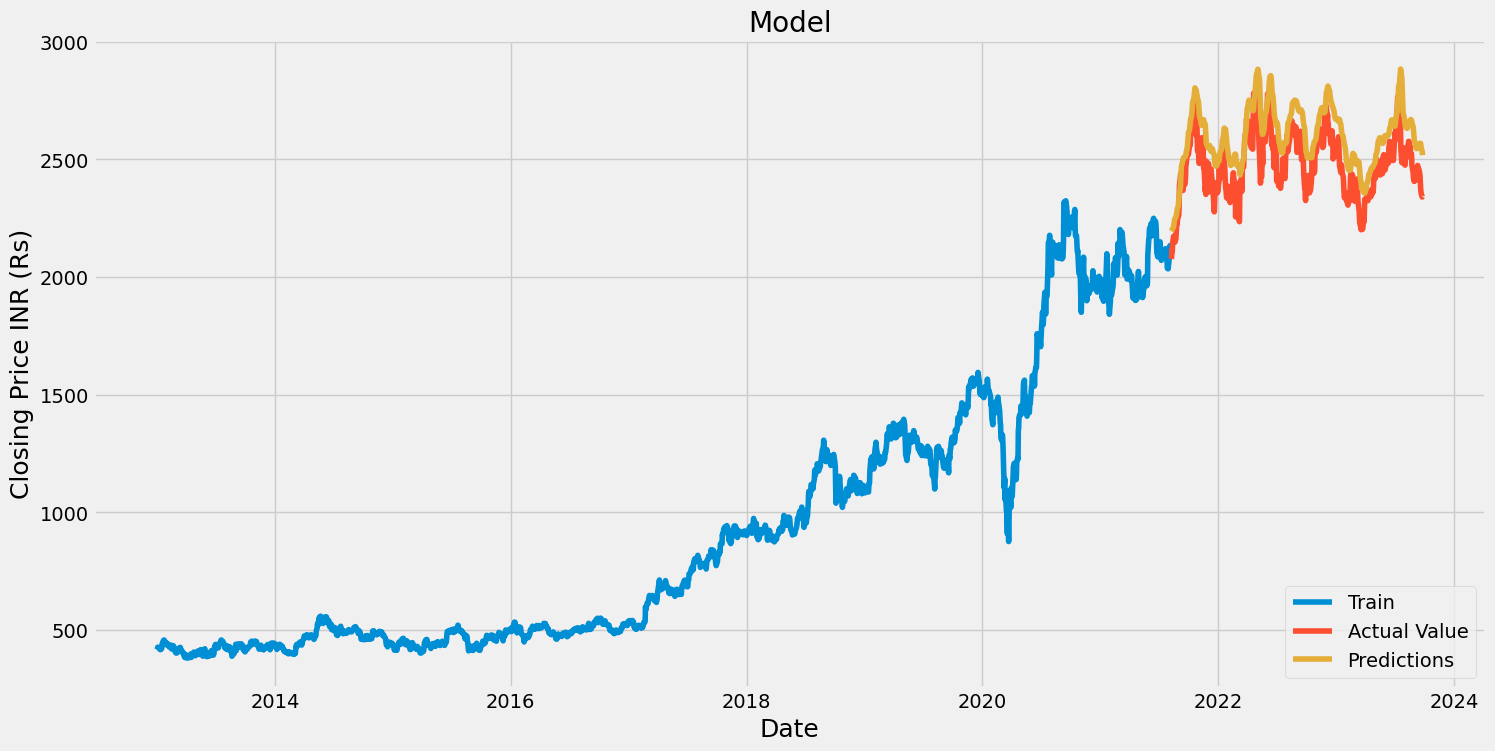

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Actual Value','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Show
valid

,Close,Predictions
Date,,
2021-08-09,2077.149902,2195.119141
2021-08-10,2088.050049,2197.168945
2021-08-11,2117.300049,2198.312012
2021-08-12,2110.500000,2202.238525
2021-08-13,2145.649902,2206.209961
...,...,...
2023-09-20,2382.149902,2568.601318
2023-09-21,2364.800049,2560.905273
2023-09-22,2354.949951,2548.446045
